In [42]:
#importing required dataset
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [43]:
ms=pd.read_csv('mushrooms.csv')

In [44]:
ms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [45]:
ms.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [46]:
ms.shape

(8124, 23)

In [47]:
ms['class'].unique()

array(['p', 'e'], dtype=object)

In [48]:
#Checking data type
ms.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [49]:
# All the variables in string format so  converting categorical value in integer format using label encoder
from sklearn.preprocessing import LabelEncoder
lbl = LabelEncoder()

In [50]:
for col in ms.columns:
    ms[col]=lbl.fit_transform(ms[col])

In [51]:
# checking data after lable encoding
ms.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [52]:
# spliting data in x and y column
y=ms['class']
x=ms.iloc[:,1:-1]
#type(x)

In [53]:
#checking the shape of new variable
x.shape

(8124, 21)

In [54]:
y.shape

(8124,)

In [55]:
#using PCA in the data and First normalise the data using StandardScalar so that the data is now between -1 and 1

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 1.02971224,  0.14012794, -0.19824983, ...,  0.94808086,
        -0.67019486, -0.5143892 ],
       [ 1.02971224,  0.14012794,  1.76587407, ...,  0.94808086,
        -0.2504706 , -1.31310821],
       [-2.08704716,  0.14012794,  1.37304929, ...,  0.94808086,
        -0.2504706 , -1.31310821],
       ...,
       [-0.8403434 ,  0.14012794, -0.19824983, ...,  0.94808086,
        -1.50964337, -2.11182722],
       [-0.21699152,  0.95327039, -0.19824983, ..., -1.27221574,
         1.42842641,  0.28432981],
       [ 1.02971224,  0.14012794, -0.19824983, ...,  0.94808086,
         0.16925365, -2.11182722]])

In [56]:
#using principal component analysis
#Even though the number of variables is not too high, I would still like to use PCA to see which variables describe the maximum variance in data
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)

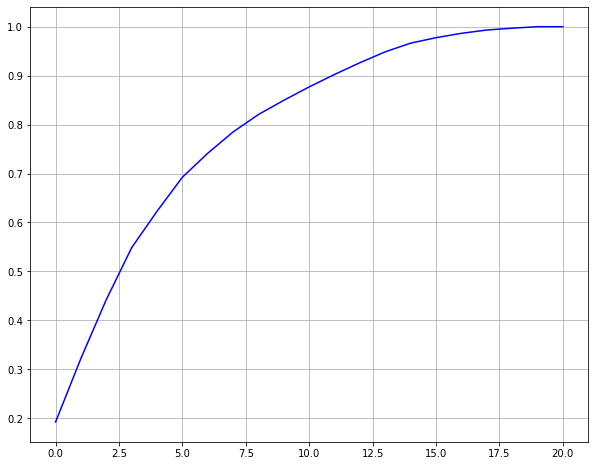

In [57]:
#plot a Scree plot of the Principal Components
plt.figure(figsize=(10,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'b')
plt.grid()

In [58]:
#from the graph, first 17 components describe the maximum variance(more than 90% of the data). We shall use them for our subsequent analysis.
new_pca = PCA(n_components=17)

In [59]:
x_new = new_pca.fit_transform(x)

In [60]:
#using KMeans to plot the clusters. We know that we have 2 classes of the target variable. So n_clusters=2
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=2)

In [61]:
k_means.fit_predict(x_new )

array([1, 1, 1, ..., 1, 0, 1])

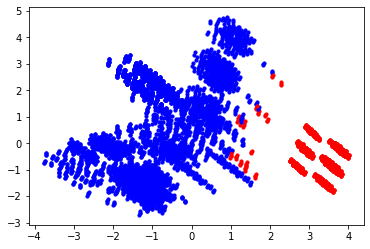

In [62]:
#plot the clusters.
colors = ['r','b']
for i in range(len(x_new)):
    plt.scatter(x_new[i][0], x_new[i][1], c=colors[k_means.labels_[i]], s=10)
plt.show()


In [63]:
#2 distinct clusters are created. Data points are far apart 
x_new.shape

(8124, 17)

In [67]:
#separate the train and test data
from sklearn.model_selection import train_test_split

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.25, random_state = 6)

In [71]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(6093, 17)
(6093,)
(2031, 17)
(2031,)


In [72]:
#using Logistic regression to build the first model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_predict =lr.predict(x_test)

In [73]:
lr_predict_prob = lr.predict_proba(x_test)

In [74]:
print(lr_predict)
print(lr_predict_prob[:,1])

[0 1 0 ... 1 0 1]
[0.04475287 0.93937547 0.00209516 ... 0.99941826 0.02573071 0.99976808]


In [77]:
#import metrics
from sklearn.metrics import confusion_matrix, accuracy_score

In [78]:
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_accuracy = accuracy_score(y_test, lr_predict)

In [79]:
print(lr_conf_matrix)
print(lr_accuracy)

[[1036   24]
 [  80  891]]
0.9487936976858691


In [82]:
#roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test,lr_predict_prob[:,1] )

In [81]:
#auc score
from sklearn.metrics import auc
lr_auc = auc(fpr, tpr)
print(lr_auc)

0.9813127878281483


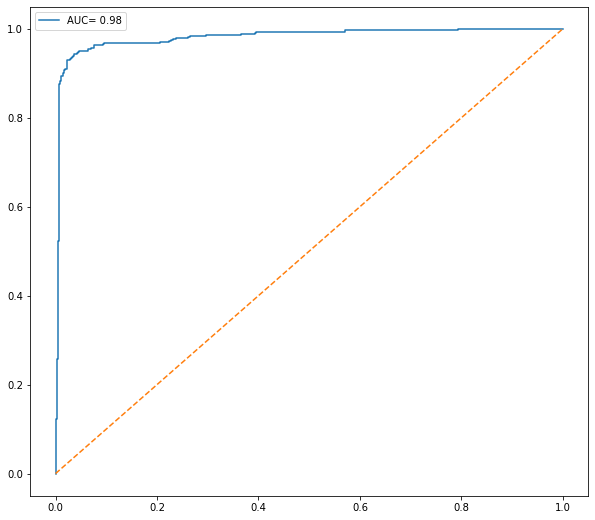

In [83]:
#plotting ROC curve
plt.figure(figsize=(10,9))
plt.plot(fpr, tpr, label = 'AUC= %0.2f' % lr_auc )
plt.plot([0,1],[0,1], linestyle = '--')
plt.legend()

In [84]:
#Using Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
gnb_predict = gnb.predict(x_test)
gnb_predict_prob = gnb.predict_proba(x_test)

In [85]:
print(gnb_predict)
print(gnb_predict_prob)

[0 1 0 ... 1 0 1]
[[5.33044650e-01 4.66955350e-01]
 [1.45019614e-04 9.99854980e-01]
 [1.00000000e+00 1.52222306e-10]
 ...
 [7.60032852e-05 9.99923997e-01]
 [9.96087562e-01 3.91243844e-03]
 [1.79864966e-04 9.99820135e-01]]


In [86]:
gnb_conf_matrix = confusion_matrix(y_test, gnb_predict)
gnb_accuracy_score = accuracy_score(y_test, gnb_predict)

In [87]:
print(gnb_conf_matrix)
print(gnb_accuracy_score)

[[990  70]
 [ 89 882]]
0.9217134416543574


In [88]:
#calculate ROC and AUC
fpr, tpr, thresholds = roc_curve(y_test, gnb_predict_prob[:,1])
#print auc
gnb_auc = auc(fpr, tpr)
print(gnb_auc)

0.961077861764763


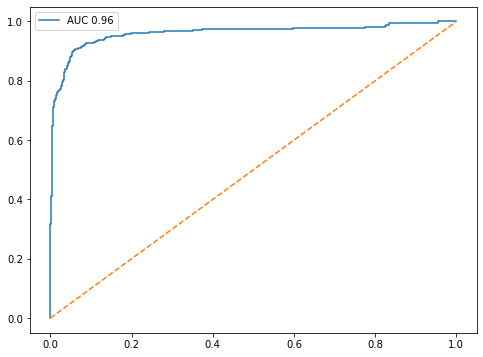

In [90]:
#plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label = 'AUC %0.2f' % gnb_auc)
plt.plot([0,1],[0,1], linestyle = '--')
plt.legend()

In [91]:
#lets use Decision Trees to classify 
#use the number of trees as 10 first
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=10)

In [92]:
dt.fit(x_train,y_train)
dt_predict = dt.predict(x_test)
dt_predict_prob = dt.predict_proba(x_test)

In [93]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [94]:
dt_conf_matrix = confusion_matrix(y_test, dt_predict)
dt_accuracy_score = accuracy_score(y_test, dt_predict)

In [95]:
print(dt_conf_matrix)
print(dt_accuracy_score)

[[1050   10]
 [  19  952]]
0.9857213195470211


In [96]:
#calculate auc and plot roc
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, dt_predict_prob[:,1])
dt_auc = auc(fpr, tpr)
print(dt_auc)

0.996692283776694


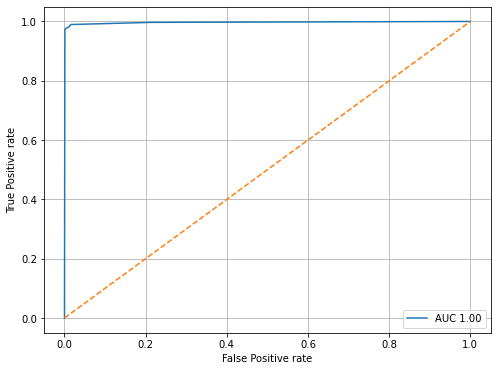

In [98]:
#plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label = 'AUC %0.2f' % dt_auc)
plt.plot([0,1],[0,1], linestyle = '--')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.legend()
plt.grid()

In [99]:
#using random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=10) #10 trees
rf.fit(x_train, y_train)
rf_predict = rf.predict(x_test)
rf_predict_prob = rf.predict_proba(x_test)

In [100]:
rf_conf_matrix = confusion_matrix(y_test,rf_predict)
rf_accuracy_score = accuracy_score(y_test, rf_predict)

In [101]:
print(rf_conf_matrix)
print(rf_accuracy_score)
#random forest has a higher accuracy score than the decision tree
#Decision tree = 99.3
#Random forest = 99.9

[[1060    0]
 [   0  971]]
1.0


In [102]:
fpr, tpr, thresholds = roc_curve(y_test, rf_predict_prob[:,1])
rf_auc = auc(fpr, tpr)
print(rf_auc)

1.0


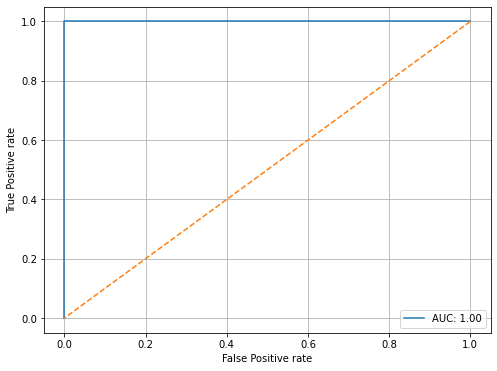

In [104]:
#plot the ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label = 'AUC: %0.2f' % rf_auc)
plt.plot([1,0],[1,0], linestyle = '--')
plt.legend(loc=0)
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.grid()